# Segmentation and morphology playground

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
import skimage.filters as flt
import plotsupport as ps
from sklearn.metrics import roc_auc_score
import pandas as pd
from collections import OrderedDict
from sklearn.metrics import roc_curve
import skimage.morphology as morph
%matplotlib inline

ModuleNotFoundError: No module named 'skimage'

## Load the data

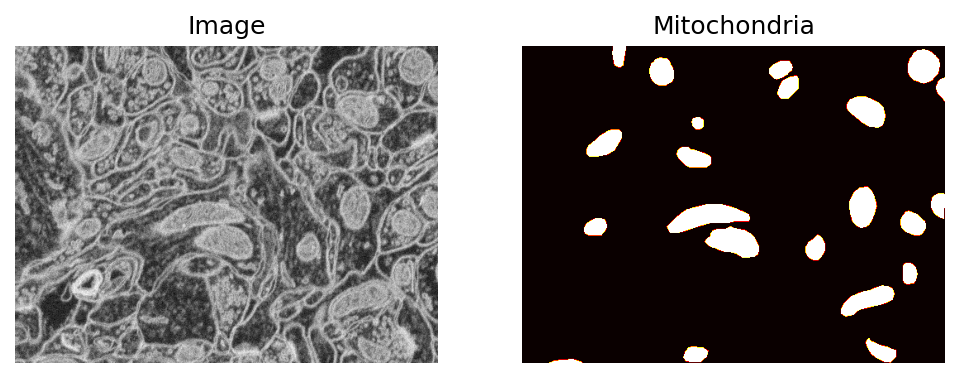

In [2]:
cell_img = (255-imread("data/em_image.png")[::2, ::2])/255.0
cell_seg = imread("data/em_image_seg.png")[::2, ::2]>0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
ax1.imshow(cell_img, cmap='gray'); ax1.set_title('Image');        ax1.axis('off');
ax2.imshow(cell_seg, cmap='hot');  ax2.set_title('Mitochondria'); ax2.axis('off');

Image segmentation from the lecture

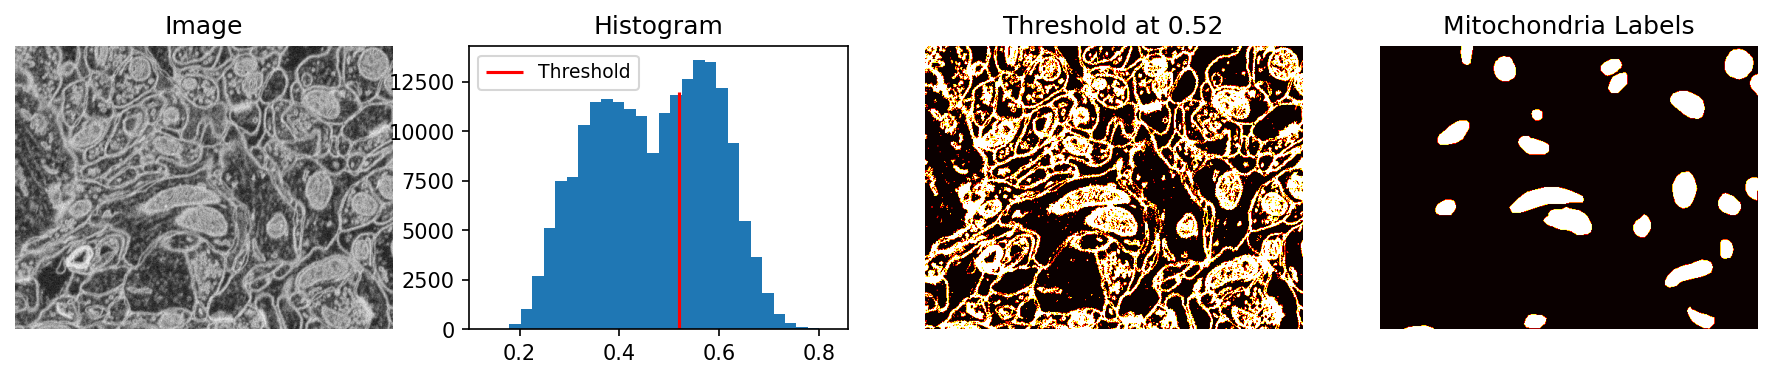

In [3]:
thresh     = 0.52 
thresh_img = cell_img > thresh # Apply a single threshold to the image

# Visualization
fig, ax = plt.subplots(1, 4, figsize=(15, 2.5), dpi=150)
ax[0].imshow(cell_img, cmap='gray');  ax[0].set_title('Image');    ax[0].axis('off')
ax[1].hist(cell_img.ravel(),bins=30); ax[1].set_title('Histogram')
ax[1].vlines(thresh,ymin=0,ymax=12000,color='r',label='Threshold'); ax[1].legend(fontsize=9)
ax[2].imshow(thresh_img, cmap='hot');   ax[2].set_title('Threshold at {0}'.format(thresh)); ax[2].axis('off')
ax[3].imshow(cell_seg,   cmap='hot');   ax[3].set_title('Mitochondria Labels');             ax[3].axis('off');

# Remove misclassified pixels

Lets try the median filter to remove misclassifications.

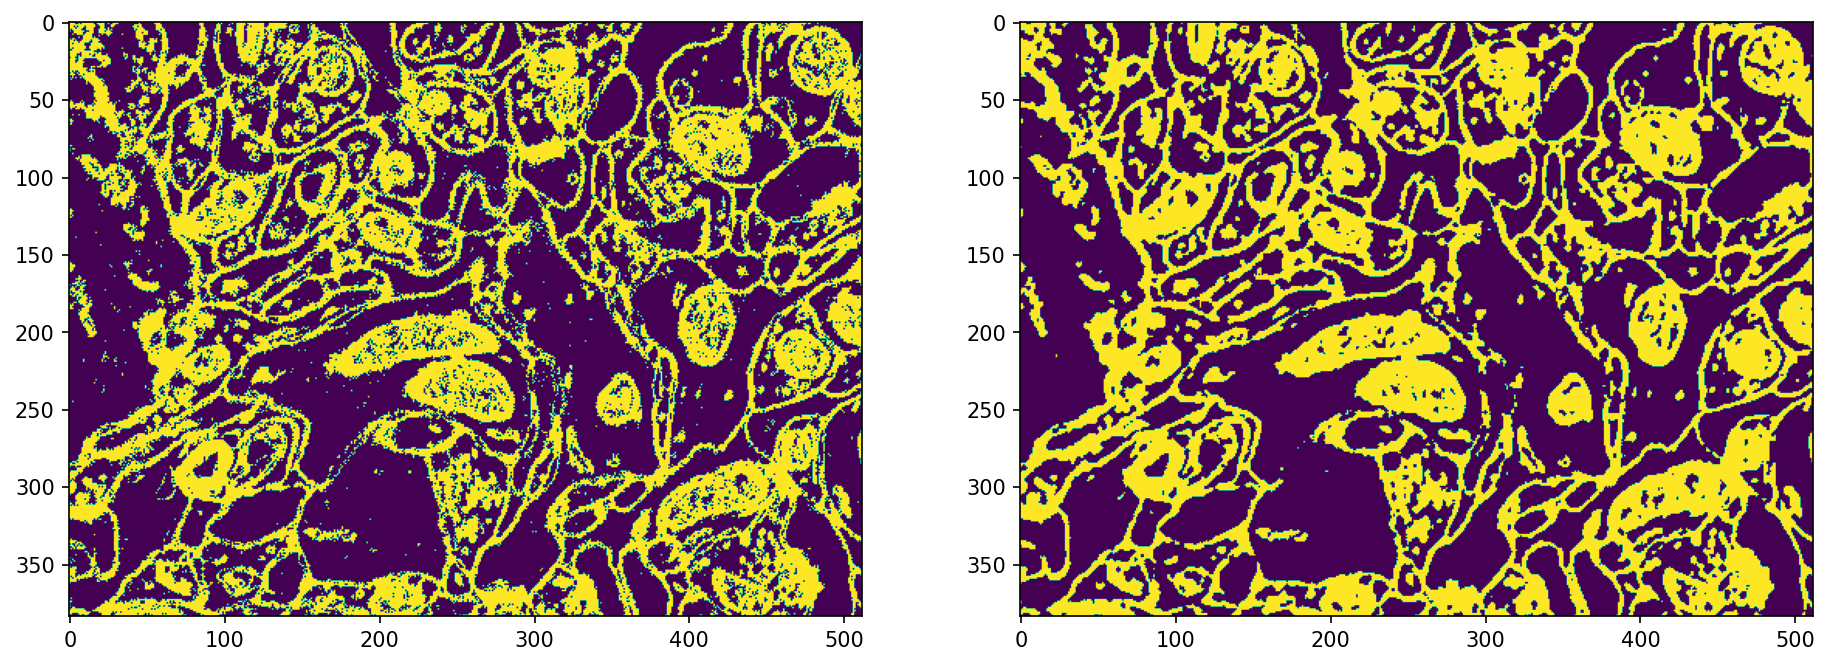

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,8), dpi=150)
ax[0].imshow(thresh_img)
ax[1].imshow(flt.median(thresh_img))

## Using morphological opening and closing

opening and closing operate on different part of the image.
- Closing removes false negatives, i.e. holes in the cells.
- Opening removes false positives, i.e. membranes between the mitochondria.

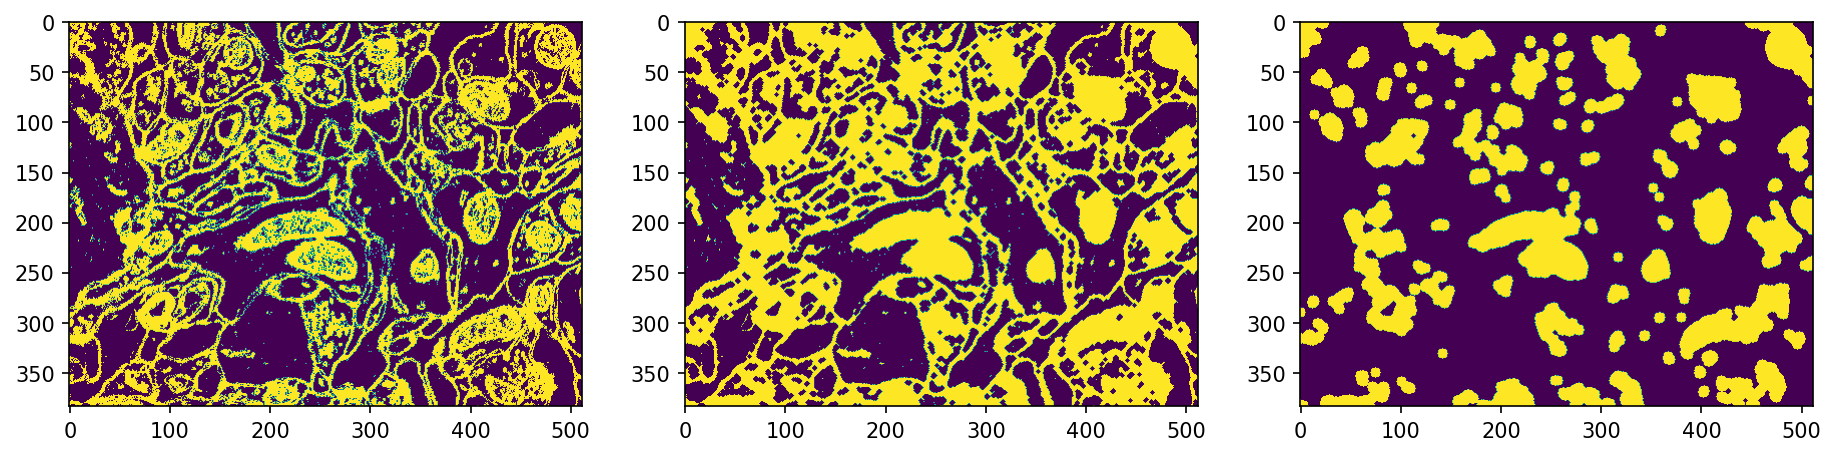

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15,8), dpi=150)
ax[0].imshow(thresh_img)
c=morph.closing(thresh_img, selem=morph.disk(2))
ax[1].imshow(morph.closing(thresh_img, selem=morph.disk(2)))
o=morph.opening(c,selem=morph.disk(5))
ax[2].imshow(morph.opening(c,selem=morph.disk(5)))

## Mixing information

Once you have created a clean mask of the features you are looking at, you can mix it with the original data to analyze the intensity information inside.

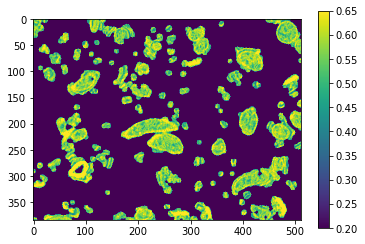

In [28]:
im=plt.imshow(o*cell_img, vmin=0.2, vmax=0.65)
plt.colorbar(im)